In [1]:
import os
os.chdir('..')

from helpers.preprocessing import GexAdtPreprocess
from train import GexAdtTrainer
from evaluate import GexAdtEvaluation

In [2]:
gex_dim = 5000
gex_adt_preprocess = GexAdtPreprocess("data/multimodal/GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad",
    gex_dim=gex_dim
)

Reading dataset...


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Feature selecting GEX...


Trying to set attribute `._uns` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.



New GEX dim: 5000;
New ADT dim: 134;
AnnData dataset's shape: (90261, 5134)



In [3]:
latent_dim = 128
gexenc = [1000, 200]
gexdec = [50, 100]
adtenc = [100, 40]
adtdec = [10, 30]
model = [gexenc, gexdec, adtenc, adtdec]
init = "he"
lr = 0.0001
weight_decay = 0.09032
gex_adt_trainer = GexAdtTrainer(
    gex_adt_preprocess, latent_dim, model=model,
    init=init, lr=lr, weight_decay=weight_decay
)

Initializing dataset and dataloader...
The order of labels: ['s1d1', 's1d1', 's1d1', 's1d1', 's1d1', ..., 's4d9', 's4d9', 's4d9', 's4d9', 's4d9']
Length: 90261
Categories (12, object): ['s1d1', 's1d2', 's1d3', 's2d1', ..., 's3d7', 's4d1', 's4d8', 's4d9']
The device: cuda;

The model: DeepGexAdtMultiModalAutoencoder(
  (gex_encoder): Sequential(
    (0): Linear(in_features=5000, out_features=1000, bias=True)
    (1): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=1000, out_features=200, bias=True)
    (5): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Linear(in_features=200, out_features=64, bias=True)
    (8): ReLU()
  )
  (adt_encoder): Sequential(
    (0): Linear(in_features=134, out_features=100, bias=True)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReL

In [4]:
epochs = 20
gex_weight = 30.661
adt_weight = 86.972
gex_adt_trainer.train(epochs=epochs, gex_loss_w=gex_weight, adt_loss_w=adt_weight, wandb_log=False)

Epoch 0 recon loss: 23092229.042408105
Epoch 1 recon loss: 55056503.099466756
Epoch 2 recon loss: 55194206.9475262
Epoch 3 recon loss: 55384580.65132871
Epoch 4 recon loss: 55470083.07763735
Epoch 5 recon loss: 55124148.44106071
Epoch 6 recon loss: 55422760.90733557
Epoch 7 recon loss: 54950344.243945345
Epoch 8 recon loss: 55389461.98276627
Epoch 9 recon loss: 55380593.05634772
Epoch 10 recon loss: 55274373.96828618
Epoch 11 recon loss: 54883894.24579969
Epoch 12 recon loss: 55503523.0083949
Epoch 13 recon loss: 55437717.87277347
Epoch 14 recon loss: 55236243.33047966
Epoch 15 recon loss: 55469930.809719786
Epoch 16 recon loss: 55195799.52351948
Epoch 17 recon loss: 54906793.3321362
Epoch 18 recon loss: 55225193.40754089
Epoch 19 recon loss: 54751052.89064027


In [5]:
gex_adt_eval = GexAdtEvaluation(
    gex_adt_trainer, gex_adt_preprocess
)


Latent space type: <class 'numpy.ndarray'>;
GEX encoded shape: torch.Size([90261, 64]);
ADT encoded shape: torch.Size([90261, 64]);
Latent space shape: (90261, 128);



0.6102491633992156
   celltype_ari  celltype_ami  celltype_homogeneity  celltype_complete  \
0      0.272992      0.575597              0.577899           0.575218   

   batch_ari  batch_ami  batch_homogeneity  batch_complete  
0   0.897058   0.737117           0.701099        0.764659  


... storing 'feature_types' as categorical
... storing 'gene_id' as categorical


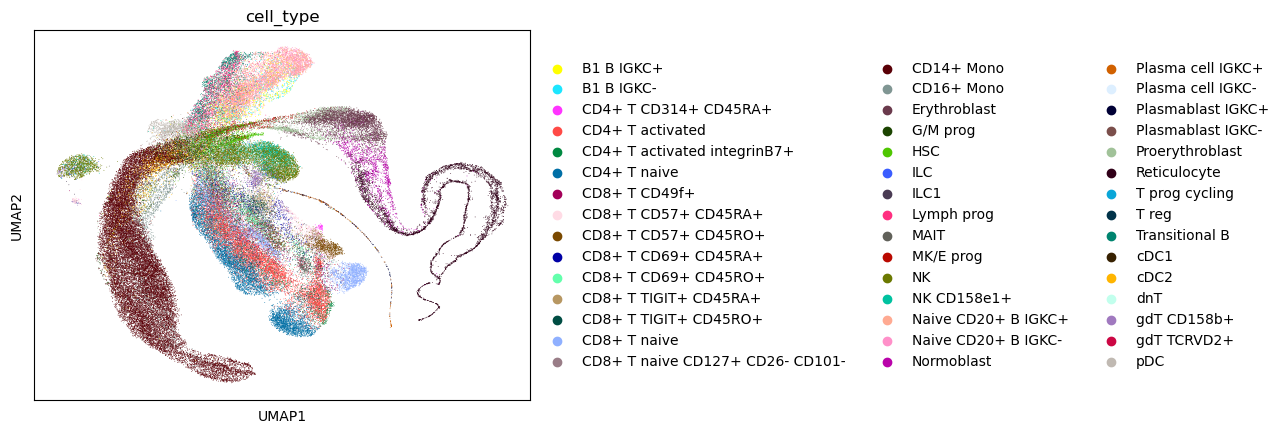

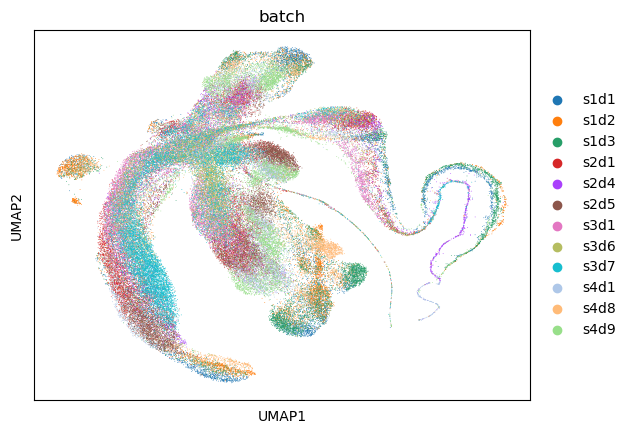

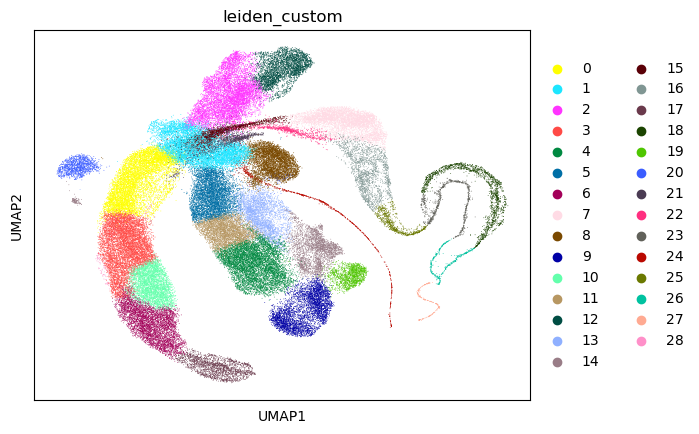

(0.6102491633992156,
    celltype_ari  celltype_ami  celltype_homogeneity  celltype_complete  \
 0      0.272992      0.575597              0.577899           0.575218   
 
    batch_ari  batch_ami  batch_homogeneity  batch_complete  
 0   0.897058   0.737117           0.701099        0.764659  )

In [6]:
gex_adt_eval.evaluate()